# Numerical Differentiation
WHAT IS IT?
Numerical Differentiation is a way we can use 

WHAT IS A DERIVATIVE?


HOW CAN WE CALCULATE IT?


We can find the derivate of both tabulated data and a continuous function using a finite difference method, which calculates rise over run of a function. To do this, we must first initalize our independant variable. Let's call this domain $x$ to be a vector such that $\vec{x}$ =
$\pmatrix{x_0, x_1, x_2, ...}$. This domain is also known as the **numerical grid**, is either determined by our data (often time) or can be set by us if it's a continuous function. The **step size** is defined as the spacing between adjacent points on the grid ($h = x_{i+1} - x_i$). Next, let's introduce the dependent variable $y$, this can be any function of $x$.

![image.png](https://pythonnumericalmethods.studentorg.berkeley.edu/_images/20.02.01-Finite-difference.png)

For this tutorial let's model a falling object reaching terminal velocity using the equation below.

$$ v(t) = 42.78 * (1 - e^{\frac{-9.81*t}{42.78}}) $$

Since we're starting with a continous function we can determine our step size ourselves, let's set it to `h=0.1`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step size
h = 4

# Initiate vectors
t = np.arange(0, 20, h) 
v = 42.78 * (1 - np.exp(-9.81 * t / 42.78))


---
## Forward Difference
The forward difference method takes the point at which we want to find the derivative and the point *forwards* on the grid.

$$ f'(x_i) = \frac{f(x_{i+1})-f(x_i)}{h} $$ 

Note that $f'$ will be 1 element shorter than $f$ due we are unable to take the derivative of the last element.

In [2]:
# Forward difference method
dvdt = (v[1:] - v[:-1]) / h

# Make a table of forward method
dvdt_fd = np.append(dvdt,np.nan)
table = np.vstack((v,dvdt_fd))
print(table)

[[ 0.         25.68442511 35.94833378 40.04995649 41.68903078]
 [ 6.42110628  2.56597717  1.02540568  0.40976857         nan]]


## Backwards Difference

Uses the point at which we want to find the derivative and the *backward* point.$$
f'(x_i) = \frac{f(x_{i})-f(x_{i-1})}{h}
$$

Notice that this equation is essentially the same as the forwards difference formula. Let's think about it this way - the slope between each point will remain the same. However, since we're using the previous element to calculate the gradient, the enitre array will be shifted to the right. We can therefore use the same dvdt equation.

In [3]:
dvdt =  (v[1:] - v[:-1]) / h

# Output results
dvdt_bd = np.insert(dvdt,0,np.nan)
table = np.vstack((v,dvdt_bd))
print(table)

[[ 0.         25.68442511 35.94833378 40.04995649 41.68903078]
 [        nan  6.42110628  2.56597717  1.02540568  0.40976857]]


## Central Difference
Combinging the two previous techniques we get the central difference. Here we average the two to slopes to get out slope.
$$
f'(x_i) = \frac{f(x_{i+1})-f(x_{i-1})}{2h}
$$

In [4]:
dvdt_cd = (v[2:] - v[:-2]) / (2*h)

# Output results
dvdt_cd = np.pad(dvdt_cd, (1, 1), mode='constant', constant_values=np.nan)
table = np.vstack((v,dvdt_cd))
print(table)

[[ 0.         25.68442511 35.94833378 40.04995649 41.68903078]
 [        nan  4.49354172  1.79569142  0.71758712         nan]]


## Visualization
Below we can plot $v(t)$ and $v'(t)$ using the methods above. Try decreasing step size and restart the kernel to see how `h` affects the derivative function.

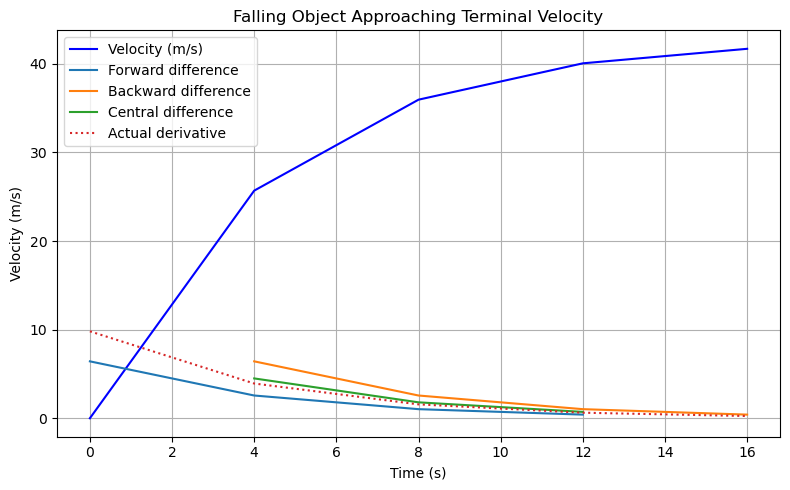

In [5]:
dvdt =  (v[1:] - v[:-1]) / (t[1:] - t[:-1])
dvdt_cd = (v[2:] - v[:-2]) / (t[2:] - t[:-2])

# Analytical derivative of v(t)
dvdt_actual = 9.81 * np.exp(-9.81 * t / 42.78)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, v, label='Velocity (m/s)', color='blue')
plt.plot(t[:-1], dvdt, label='Forward difference')
plt.plot(t[1:], dvdt, label='Backward difference')
plt.plot(t[1:-1], dvdt_cd, label='Central difference')
plt.plot(t, dvdt_actual, label='Actual derivative', linestyle='dotted')
#plt.axhline(y=42.78, color='red', linestyle='--', label=f'Terminal velocity')
plt.title('Falling Object Approaching Terminal Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Comparing Forward, Backward and Central Difference

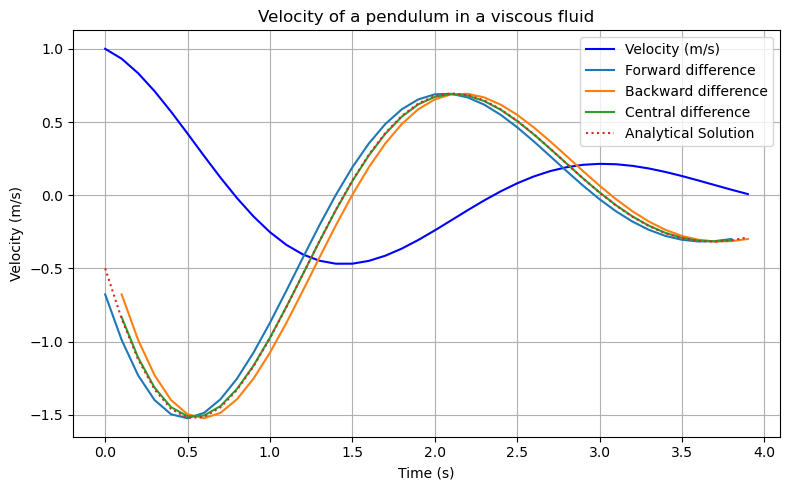

17.73%
16.68%
1.22%


In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Initiate Horizontal Axis
h = 0.1 # Step size
t = np.arange(0, 4, h)

## Initiate Vertical Axis
# Wave parameters
A = 1.0         # amplitude
k = 0.5         # damping coefficient
omega = 2.0     # angular frequency
v = A * np.exp(-k * t) * np.cos(omega * t)   # Velocity v(t)


# Finite difference methods (forward, backwards and central)
dvdt_fd = (v[1:] - v[:-1]) / h
dvdt_bd = (v[1:] - v[:-1]) / h
dvdt_cd = (v[2:] - v[:-2]) / (2*h)

#Actual solution (Analytical)
dvdt_actual=A*np.exp(-k*t)*(-k*np.cos(omega*t)-omega*np.sin(omega*t))


# Plotting
plt.figure(figsize=(8, 5))
plt.plot(t, v, label='Velocity (m/s)', color='blue')
plt.plot(t[:-1], dvdt_fd, label='Forward difference')
plt.plot(t[1:], dvdt_bd, label='Backward difference')
plt.plot(t[1:-1], dvdt_cd, label='Central difference')
plt.plot(t, dvdt_actual, label='Analytical Solution',linestyle='dotted')
plt.title('Velocity of a pendulum in a viscous fluid')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


max_error_fd = max(abs(dvdt_fd - dvdt_actual[:-1]))
max_error_bd = max(abs(dvdt_bd - dvdt_actual[1:]))
max_error_cd = max(abs(dvdt_cd - dvdt_actual[1:-1]))

error = [max_error_fd, max_error_bd, max_error_cd]

print(f"{error[0]*100:.2f}%\n{error[1]*100:.2f}%\n{error[2]*100:.2f}%")